# **⭐ Classification Model to Identify Species of Fish**

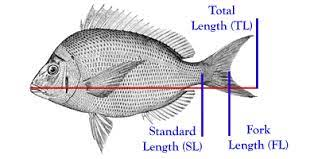

The Fish Catch data set contains measurements on 159 fish caught in the lake Laengelmavesi, Finland. For the 159 fishes of 7 species the weight, length, height, and width were measured. Three different length measurements are recorded: from the nose of the fish to the beginning of its tail, from the nose to the notch of its tail and from the nose to the end of its tail. The height and width are calculated as percentages of the third length variable. This results in 6 observed variables, Weight, Length1, Length2, Length3, Height, Width. The variable, Species, represents the grouping structure: the 7 species are 1=Bream, 2=Whitewish, 3=Roach, 4=Parkki, 5=Smelt, 6=Pike, 7=Perch.

- SL: Standard Length---Length1
- FL: Fork Length--------Length2
- TL: Total Length-------Length3
- BT: Body Thickness----Height
- BD: Body Depth--------Width

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

In [ ]:
# view data
fish.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [ ]:
# info of data
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
# summary statistics
fish.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [ ]:
# check for missing value
fish.isna().sum()

Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

In [ ]:
# check for categories
fish.nunique()

Category      7
Species       7
Weight      101
Height      154
Width       152
Length1     116
Length2      93
Length3     124
dtype: int64

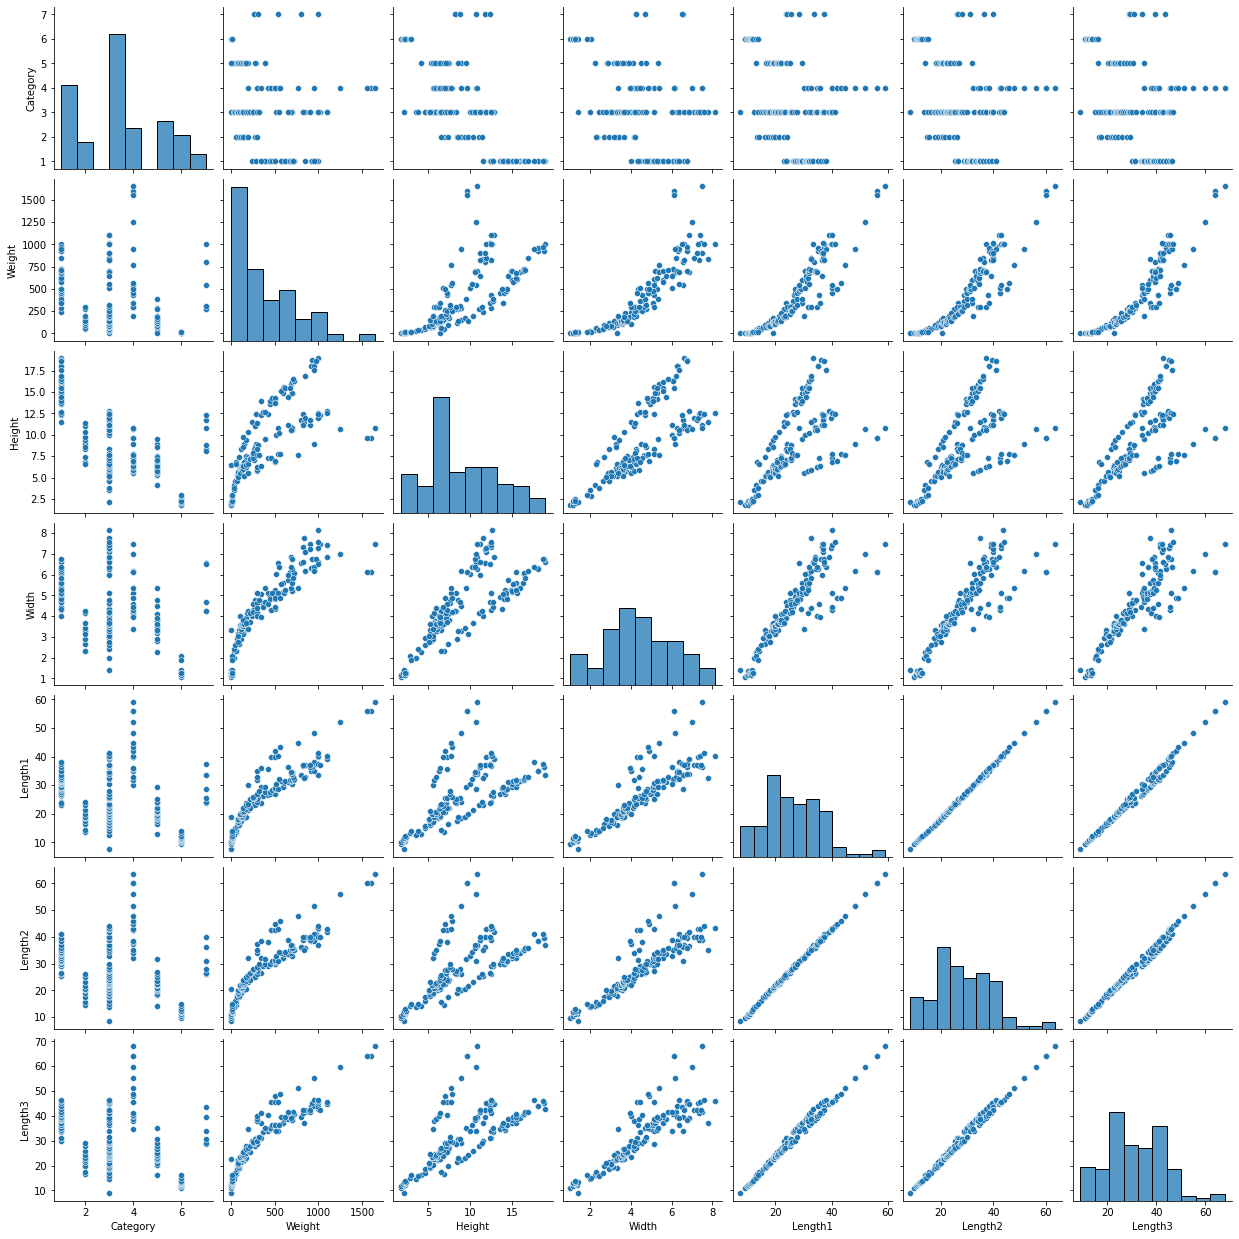

In [ ]:
# visualize pairplot
sns.pairplot(fish)

In [ ]:
# columns name
fish.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [ ]:
# define y
y = fish['Category']

In [ ]:
# define X
X = fish[['Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3']]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 6), (48, 6), (111,), (48,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
# model accuracy
accuracy_score(y_test,y_pred)

0.7708333333333334

In [ ]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  1,  0,  0],
       [ 0,  0,  1,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  1,  0,  1],
       [ 0,  0,  2,  0,  0,  4,  0],
       [ 0,  0,  1,  0,  0,  0,  0]])

In [ ]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         1
           3       0.64      0.94      0.76        17
           4       1.00      0.80      0.89         5
           5       0.50      0.14      0.22         7
           6       1.00      0.67      0.80         6
           7       0.00      0.00      0.00         1

    accuracy                           0.77        48
   macro avg       0.73      0.65      0.67        48
weighted avg       0.78      0.77      0.74        48



In [ ]:
# future prediction
sample = fish.sample()
sample

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
78,3,Perch,78.0,5.1992,3.1234,16.8,18.7,19.4


In [ ]:
# define X_new
X_new = sample.loc[:,X.columns]
X_new

In [ ]:
# predict for X_new
model.predict(X_new)

array([3])